In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

In [2]:
# Создаём обучающую выборку
ames_data = pd.read_csv('data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']

In [3]:
# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)

DecisionTreeRegressor(max_depth=3)

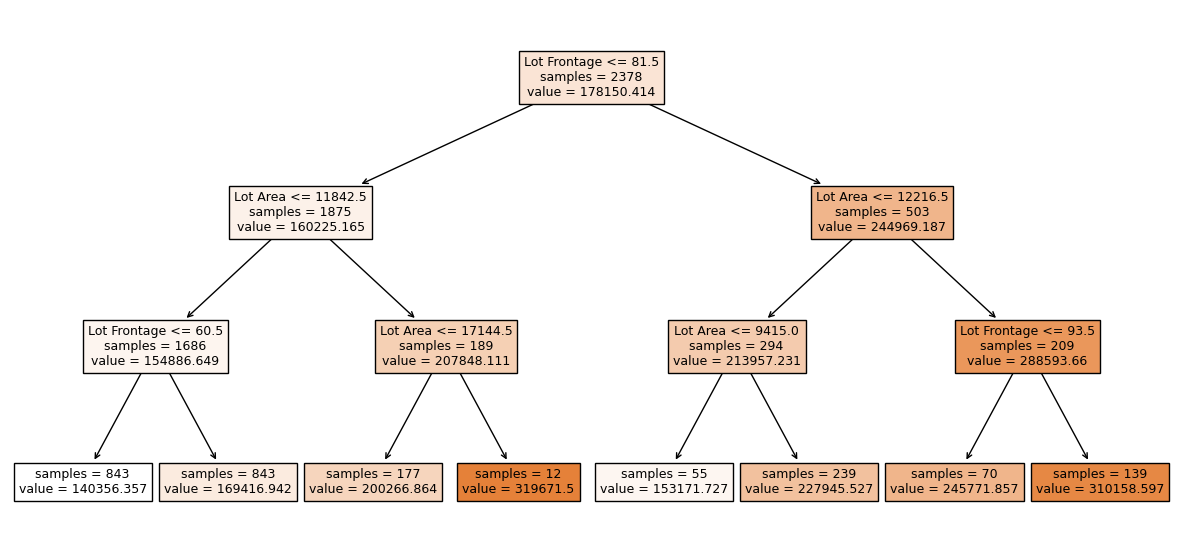

In [8]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

In [15]:
X['Lot Frontage'].max()+1

151.0

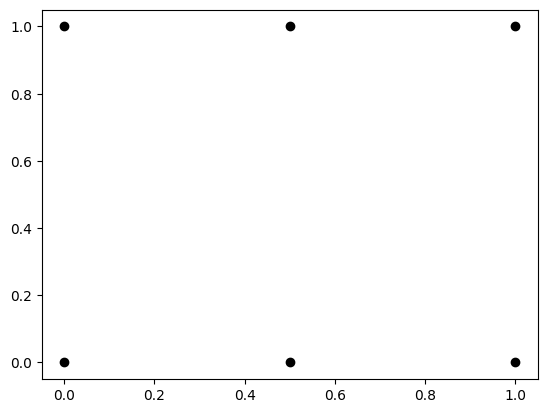

In [19]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x,y)
import matplotlib.pyplot as plt
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

(2444460, 1) (18660, 131)


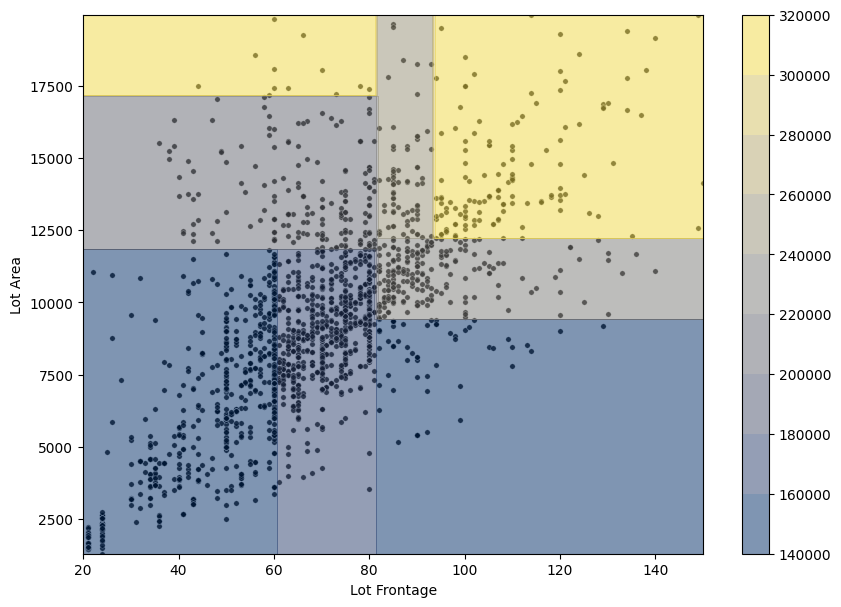

In [21]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    ) 
    print(xx1.reshape(-1, 1).shape,xx2.shape)
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

In [4]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
data = pd.DataFrame(
    {'x1': [1,2,3,4,5],
     'x2': ['red', 'green', 'red', 'green', 'green']}
)
tree = DecisionTreeClassifier()
tree.fit(X=data, y=np.arange(5))

ValueError: could not convert string to float: 'red'